# Outliers
Extreme value

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [13]:
salary = [11,40,45,68,65,68,78,90,57,74,91,92,88,68,57,48,99,101,68,72,59,88,57,87,98,67,90,110,140]

In [14]:
salary

[11,
 40,
 45,
 68,
 65,
 68,
 78,
 90,
 57,
 74,
 91,
 92,
 88,
 68,
 57,
 48,
 99,
 101,
 68,
 72,
 59,
 88,
 57,
 87,
 98,
 67,
 90,
 110,
 140]

In [5]:
# five point summary
# min. 25th, 50, 75th, 100th

In [15]:
np.quantile(salary, [0,0.25,0.50,0.75,1])

array([ 11.,  59.,  72.,  90., 140.])

In [16]:
df = pd.DataFrame(salary, columns = ['Salary'])

In [17]:
df.describe()

,Salary
count,29.000000
mean,75.034483
std,24.831551
min,11.000000
25%,59.000000
50%,72.000000
75%,90.000000
max,140.000000


In [18]:
# ways to check outliers
# distribution or boxplot

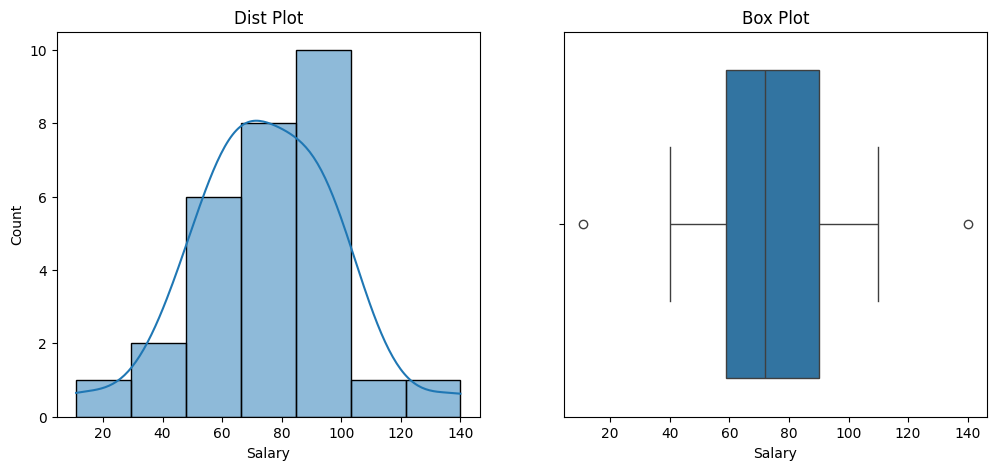

In [19]:
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
sns.histplot(df['Salary'], kde= True)
plt.title("Dist Plot")


plt.subplot(1,2,2)
sns.boxplot(data = df, x= 'Salary')
plt.title("Box Plot")
plt.show()

In [20]:
# Distribution is not skewed as outliers are present both sided.
# in box plot , we see there are outliers.

# How to deal?
# Dropping the outlier
# Capping the outlier
# Replacing the outlier with mean and median

In [21]:
# Dropping the outlier

In [22]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR

In [25]:
df_filtered = df[(df.Salary >= lower_fence) & (df.Salary <= upper_fence)]

In [24]:
df.shape

(29, 1)

In [26]:
df_filtered.shape

(27, 1)

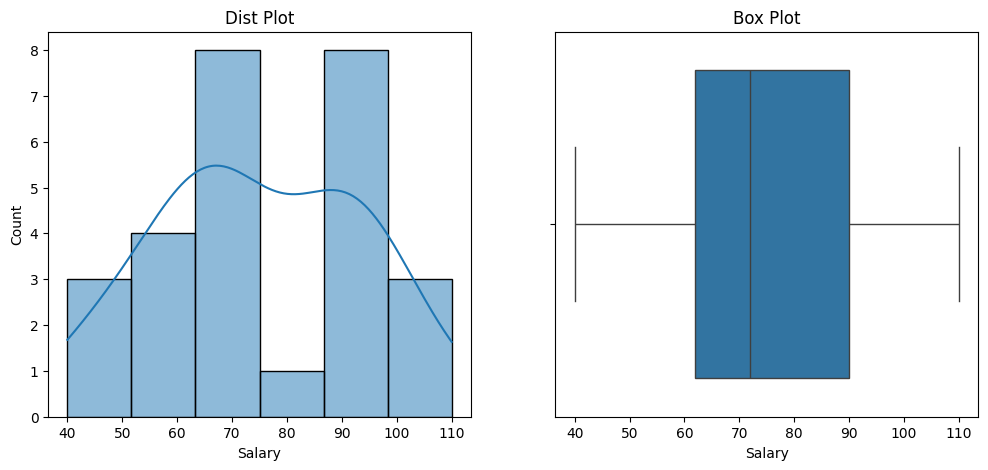

In [28]:
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
sns.histplot(df_filtered['Salary'], kde= True)
plt.title("Dist Plot")


plt.subplot(1,2,2)
sns.boxplot(data = df_filtered, x= 'Salary')
plt.title("Box Plot")
plt.show()

In [37]:
# Imputation with mean

df['Salary_imputed_mean'] = np.where((df.Salary >= upper_fence) | (df.Salary <= lower_fence), df['Salary'].mean(), df['Salary'])



In [33]:
df

,Salary,Salary_imputed_mean
0,11,75.034483
1,40,40.000000
2,45,45.000000
3,68,68.000000
4,65,65.000000
5,68,68.000000
6,78,78.000000
7,90,90.000000
8,57,57.000000
9,74,74.000000


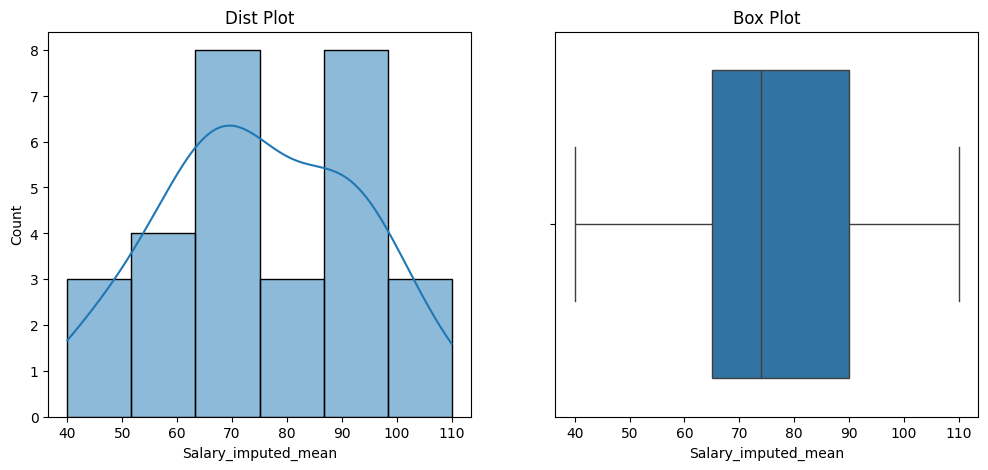

In [36]:
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
sns.histplot(df['Salary_imputed_mean'], kde= True)
plt.title("Dist Plot")


plt.subplot(1,2,2)
sns.boxplot(data = df, x= 'Salary_imputed_mean')
plt.title("Box Plot")
plt.show()

In [38]:
# Imputation with medeian

df['Salary_imputed_median'] = np.where((df.Salary >= upper_fence) | (df.Salary <= lower_fence), df['Salary'].median(), df['Salary'])



In [39]:
df

,Salary,Salary_imputed_mean,Salary_imputed_median
0,11,75.034483,72.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


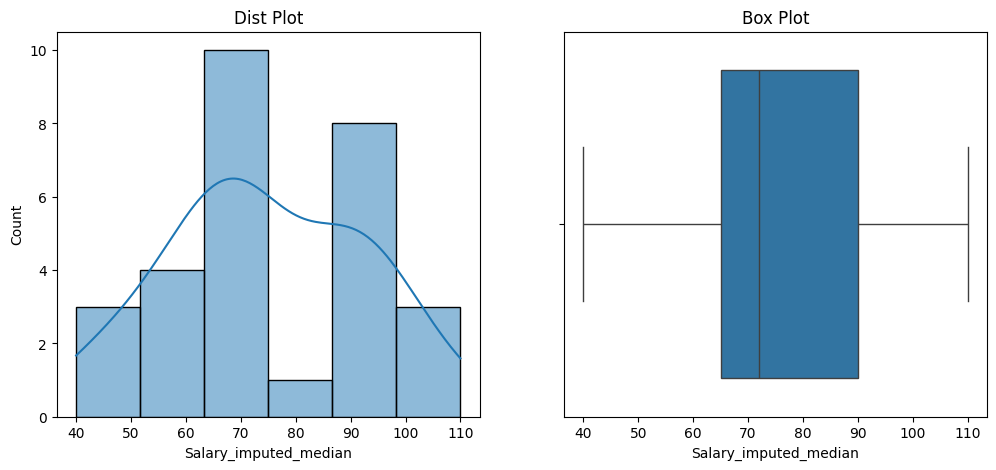

In [40]:
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
sns.histplot(df['Salary_imputed_median'], kde= True)
plt.title("Dist Plot")


plt.subplot(1,2,2)
sns.boxplot(data = df, x= 'Salary_imputed_median')
plt.title("Box Plot")
plt.show()

In [42]:
# Capping >> replacing the nearest value which is not outliers
df  # 11 will be replaced by 40

,Salary,Salary_imputed_mean,Salary_imputed_median
0,11,75.034483,72.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


In [43]:
lower_cap = df['Salary'].quantile(0.05) # lower cap is 5th percentile
upper_cap = df['Salary'].quantile(0.95) # upper cap is 95th percentile


In [44]:
lower_cap

np.float64(42.0)

In [45]:
upper_cap

np.float64(106.39999999999998)

In [51]:
# replace outlier with cap

df['Salary_capped'] = np.where(df['Salary'] < lower_cap, lower_cap,
        np.where(df['Salary'] > upper_cap, upper_cap, df['Salary']))

In [53]:
df

,Salary,Salary_imputed_mean,Salary_imputed_median,Salary_capped
0,11,75.034483,72.0,42.0
1,40,40.000000,40.0,42.0
2,45,45.000000,45.0,45.0
3,68,68.000000,68.0,68.0
4,65,65.000000,65.0,65.0
5,68,68.000000,68.0,68.0
6,78,78.000000,78.0,78.0
7,90,90.000000,90.0,90.0
8,57,57.000000,57.0,57.0
9,74,74.000000,74.0,74.0


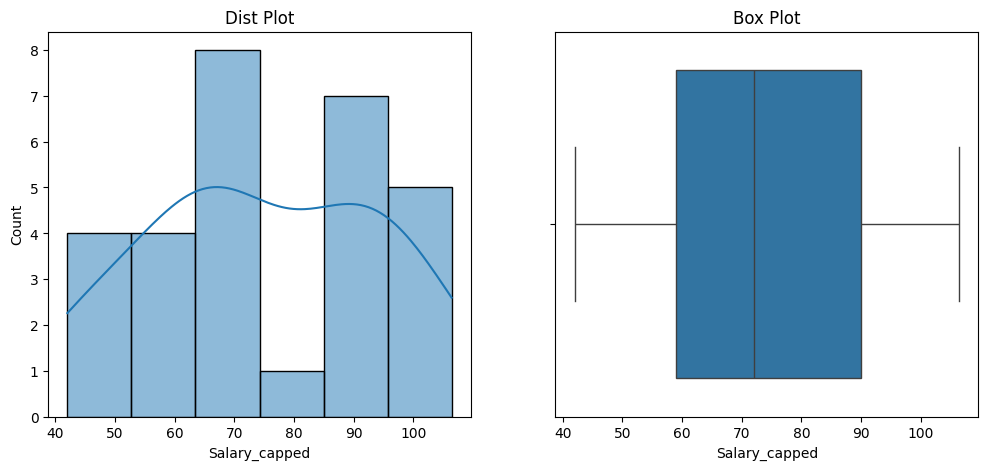

In [54]:
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
sns.histplot(df['Salary_capped'], kde= True)
plt.title("Dist Plot")


plt.subplot(1,2,2)
sns.boxplot(data = df, x= 'Salary_capped')
plt.title("Box Plot")
plt.show()